In [1]:
import utils
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from astropy.io import ascii
from scipy import optimize
from matplotlib import mlab

In [2]:
df_data = utils.read_data("datasets/time-curves/2301590/")

In [3]:
df = df_data[['TIME','SAP_FLUX','PDCSAP_FLUX','SAP_FLUX_ERR','PDCSAP_FLUX_ERR','CADENCENO']].dropna()

In [4]:
col = ['SAP_FLUX','PDCSAP_FLUX']
ecol = ['SAP_FLUX_ERR','PDCSAP_FLUX_ERR']
col2 = ['F','FPDC']   # Names for the modified columns.
ecol2 = ['EF','EFPDC']

In [5]:
r = copy.deepcopy(df)

In [6]:
for c,ec,c2,ec2 in zip(col,ecol,col2,ecol2):
    medf = np.median(r[c])
    norm = r[c] / medf - 1
    enorm = r[ec] / medf
    r[c2] = norm
    r[ec2] = enorm

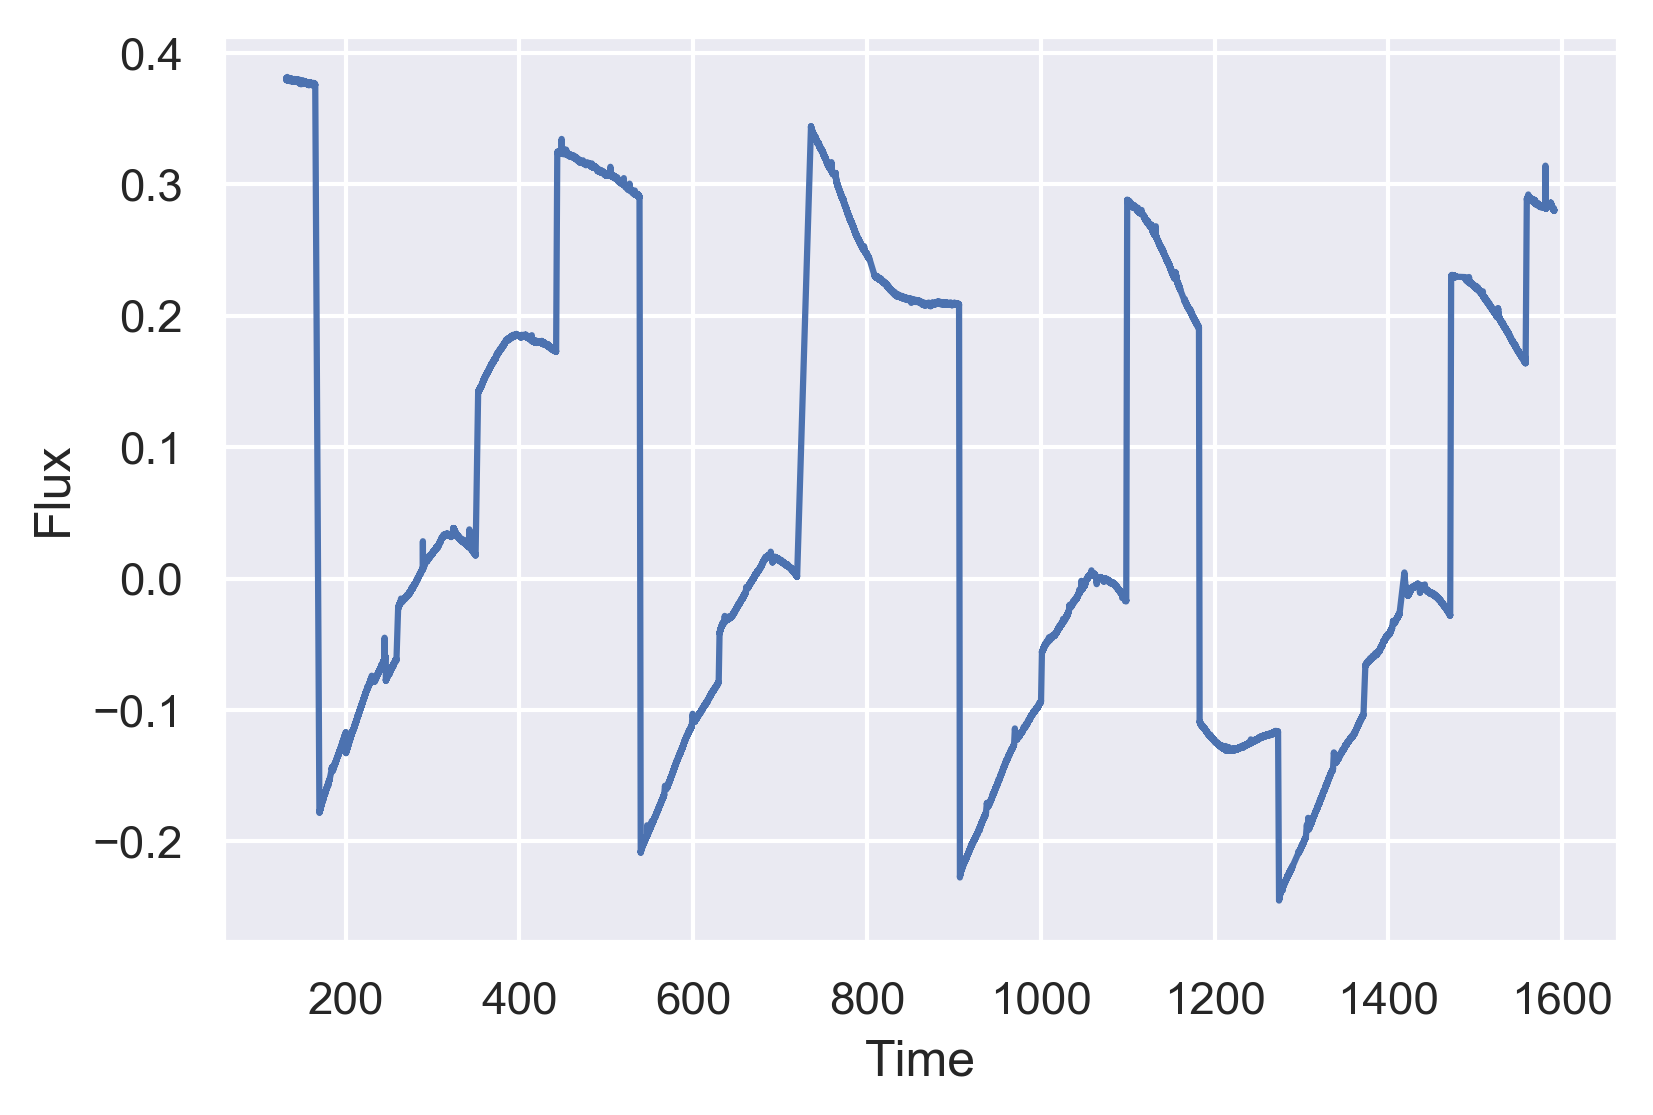

In [7]:
utils.plot_data(r.TIME,r.F)

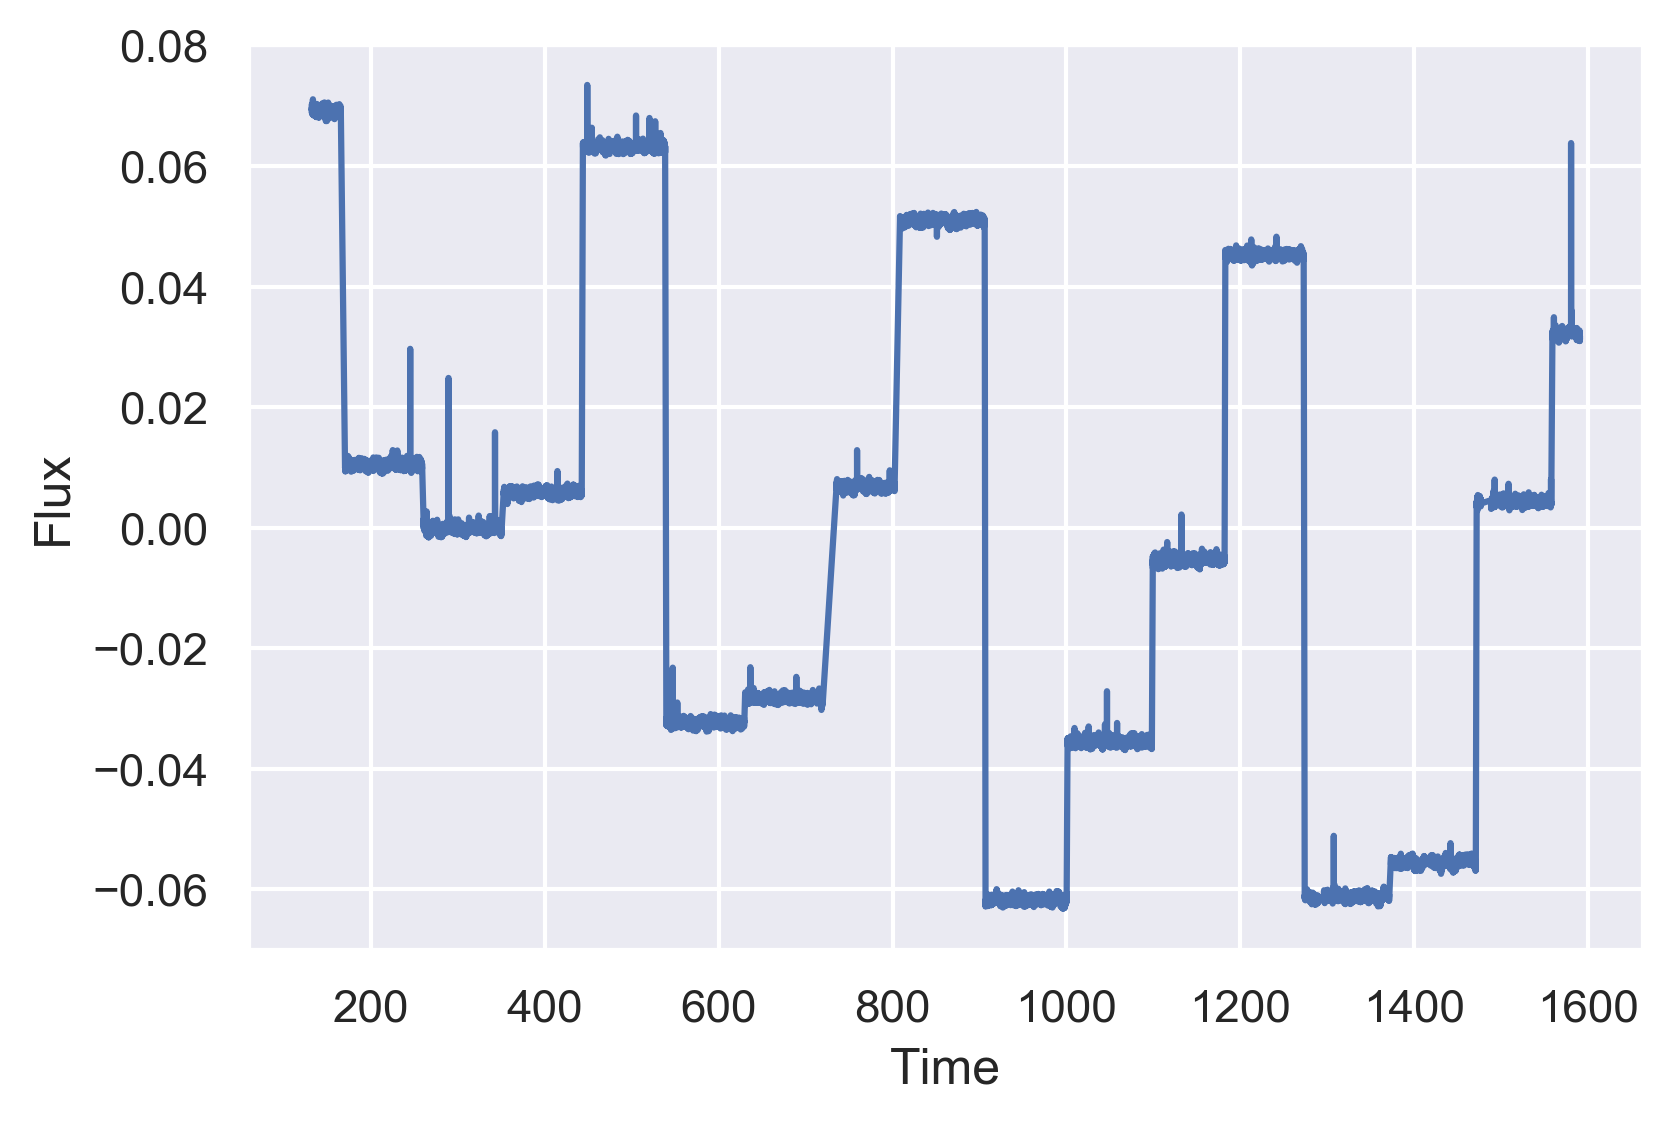

In [8]:
utils.plot_data(r.TIME,r.FPDC)

In [9]:
utils.remove_noise(r, r.F)

In [10]:
r = r.dropna()

In [11]:
tt = r.TIME
yy = r.MEDIAN
res = utils.fit_sin(tt,yy)

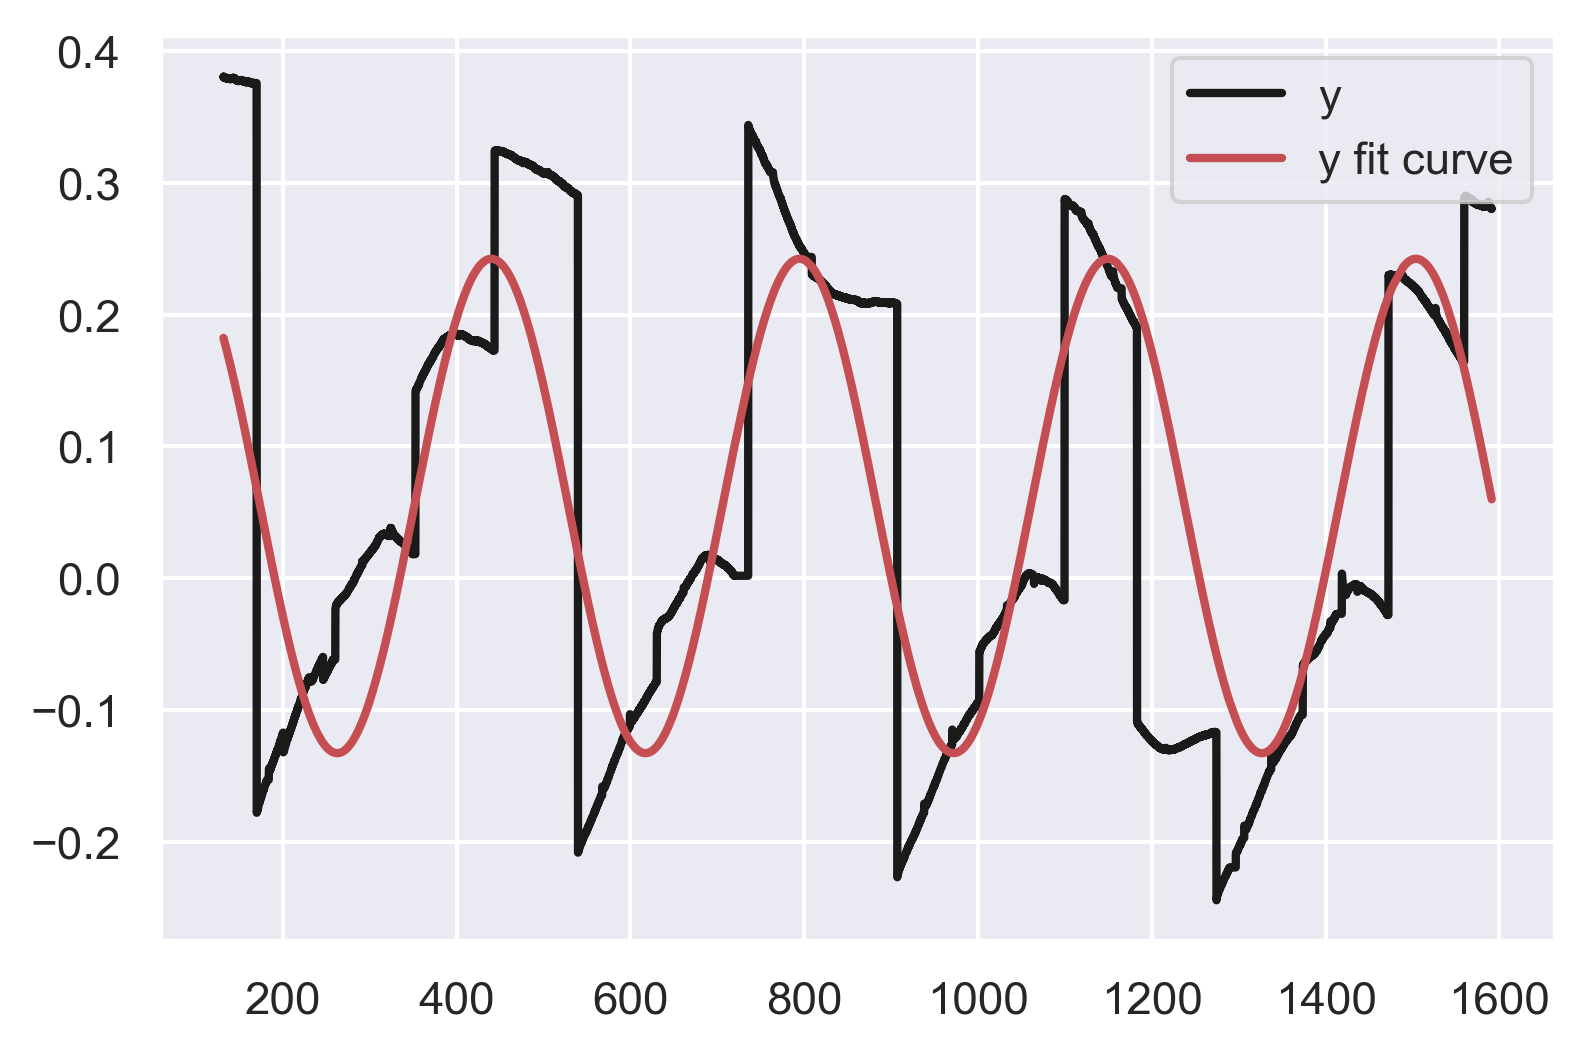

In [12]:
plt.figure(1,dpi=300)
plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, res["fitfunc"](tt), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

In [13]:
res['period']

354.65957088070854

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69302 entries, 0 to 1555
Data columns (total 21 columns):
TIME               66388 non-null float64
TIME_BJD           66388 non-null float64
TIMECORR           69302 non-null float64
CADENCENO          69302 non-null float64
SAP_FLUX           65434 non-null float64
SAP_FLUX_ERR       65434 non-null float64
SAP_BKG            65434 non-null float64
SAP_BKG_ERR        65434 non-null float64
PDCSAP_FLUX        64795 non-null float64
PDCSAP_FLUX_ERR    64795 non-null float64
SAP_QUALITY        69302 non-null float64
PSF_CENTR1         0 non-null float64
PSF_CENTR1_ERR     0 non-null float64
PSF_CENTR2         0 non-null float64
PSF_CENTR2_ERR     0 non-null float64
MOM_CENTR1         65434 non-null float64
MOM_CENTR1_ERR     65434 non-null float64
MOM_CENTR2         65434 non-null float64
MOM_CENTR2_ERR     65434 non-null float64
POS_CORR1          65646 non-null float64
POS_CORR2          65646 non-null float64
dtypes: float64(21)
memory

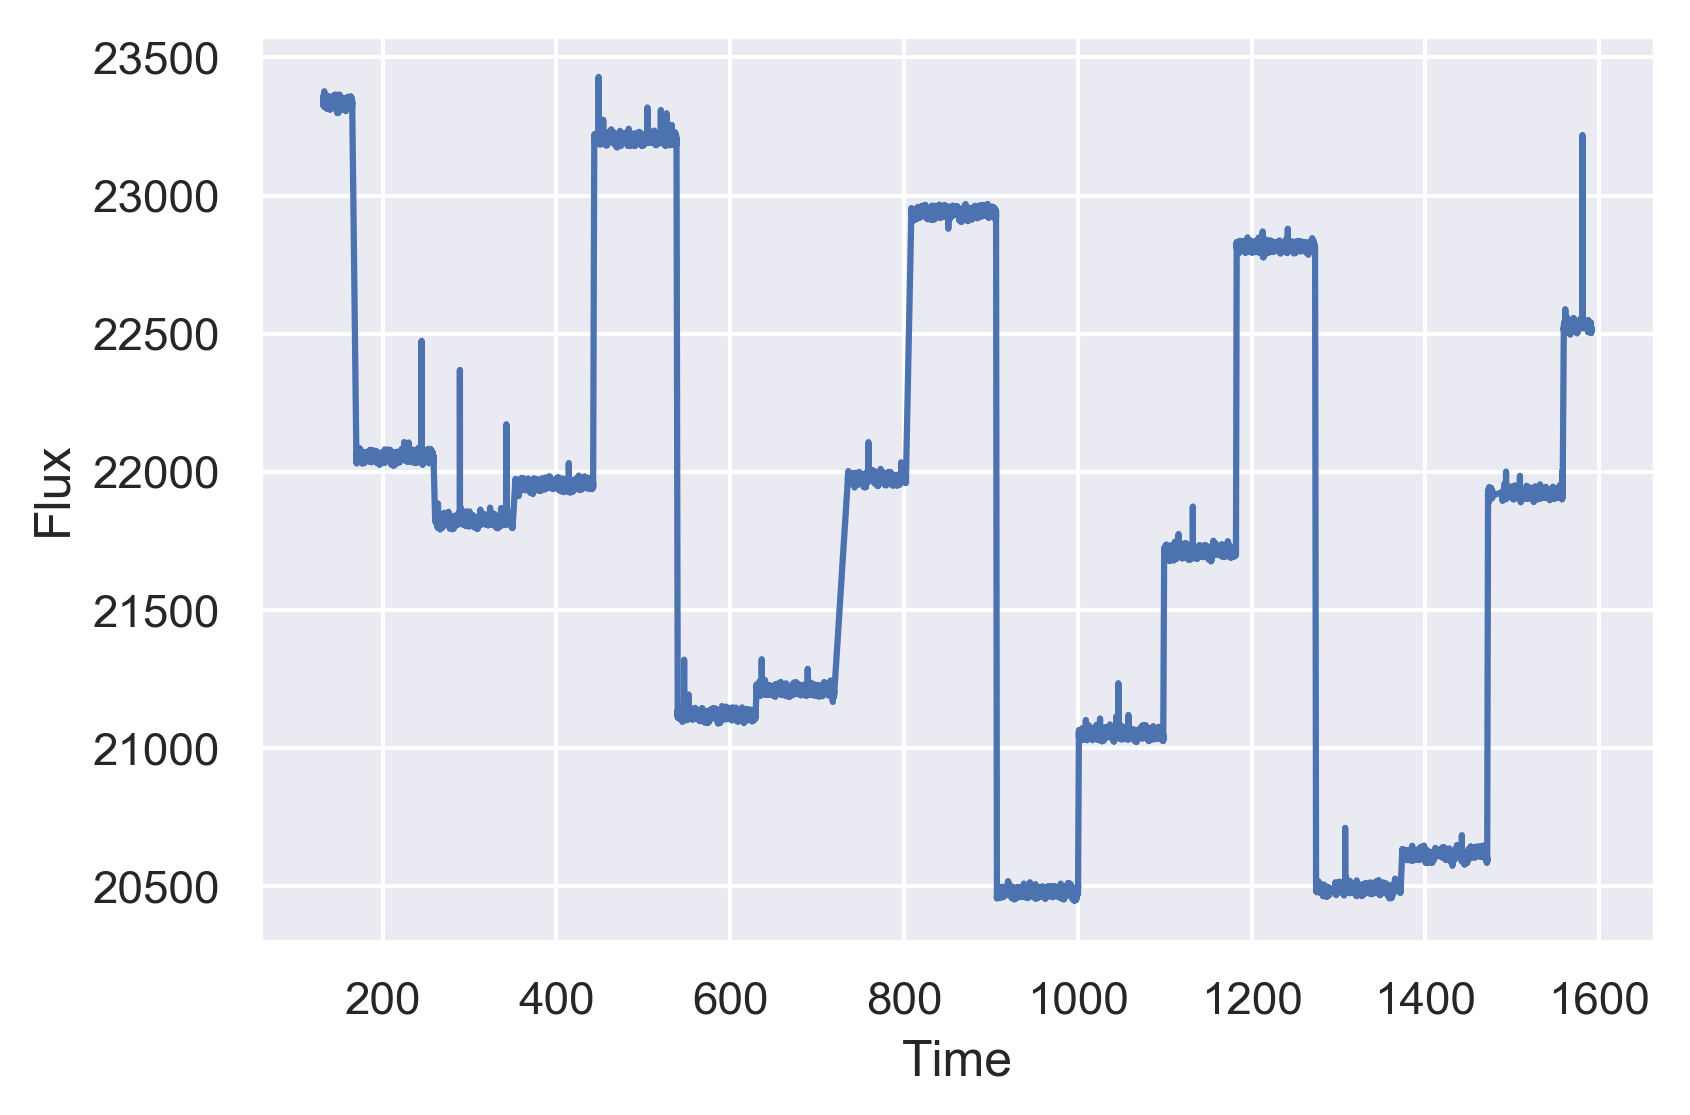

In [21]:
utils.plot_data(df_data.TIME,df_data.PDCSAP_FLUX)

## import fits file

In [39]:
from astropy.io import fits
from astropy.table import Table

In [53]:
filename = "datasets/time-curves/2301590/kplr002301590-2009166043257_llc.fits"

In [54]:
fits.info(filename)

Filename: datasets/time-curves/2301590/kplr002301590-2009166043257_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   1639R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (6, 4)   int32   


In [55]:
with fits.open(filename) as hdulist: 
    header1 = hdulist[1].header
  
print(repr(header1[0:24])) #repr() prints the info into neat columns

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 1639 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [56]:
with fits.open(filename, mode="readonly") as hdulist:
    # Read in the "BJDREF" which is the time offset of the time array.
    bjdrefi = hdulist[1].header['BJDREFI'] 
    bjdreff = hdulist[1].header['BJDREFF']

    # Read in the columns of data.
    times = hdulist[1].data['time'] 
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

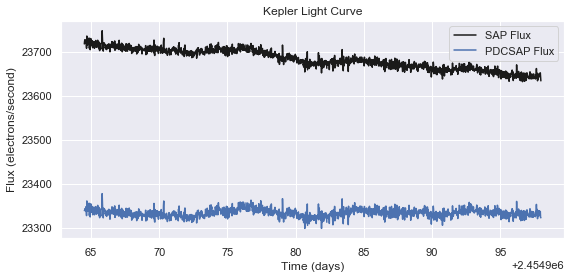

In [57]:
# Convert the time array to full BJD by adding the offset back in.
bjds = times + bjdrefi + bjdreff 

plt.figure(figsize=(9,4))

# Plot the time, uncorrected and corrected fluxes.
plt.plot(bjds, sap_fluxes, '-k', label='SAP Flux') 
plt.plot(bjds, pdcsap_fluxes, '-b', label='PDCSAP Flux') 

plt.title('Kepler Light Curve')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Flux (electrons/second)')
plt.show()

In [58]:
with fits.open(filename) as hdulist: 
    imgdata = hdulist[2].data
    
print(imgdata)

[[0 1 1 1 1 0]
 [1 1 3 3 1 1]
 [1 1 3 3 3 1]
 [1 1 3 3 3 3]]


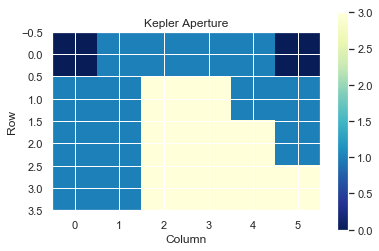

In [59]:
plt.figure(2)
plt.title('Kepler Aperture')
plt.imshow(imgdata, cmap=plt.cm.YlGnBu_r)
plt.xlabel('Column')
plt.ylabel('Row')
plt.colorbar()

In [73]:
folder_path="datasets/time-curves/2301590/"

filenames = os.listdir(folder_path)
for filename in filenames:
    if(filename.endswith('.fits')):
        first_file = filename
        break

with fits.open(folder_path+filename, mode="readonly") as hdulist:
    # Read in the "BJDREF" which is the time offset of the time array.
    bjdrefi = hdulist[1].header['BJDREFI'] 
    bjdreff = hdulist[1].header['BJDREFF']
    # Read in the columns of data.
    times = hdulist[1].data['time'] 
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']    

for filename in filenames:
    if(filename.endswith('.fits') and not filename == first_file):
        with fits.open(folder_path+filename, mode="readonly") as hdulist:           

            # Read in the columns of data.
            times = np.append(times, hdulist[1].data['time'])
            sap_fluxes = np.append(sap_fluxes, hdulist[1].data['SAP_FLUX'])
            pdcsap_fluxes = np.append(pdcsap_fluxes, hdulist[1].data['PDCSAP_FLUX'])

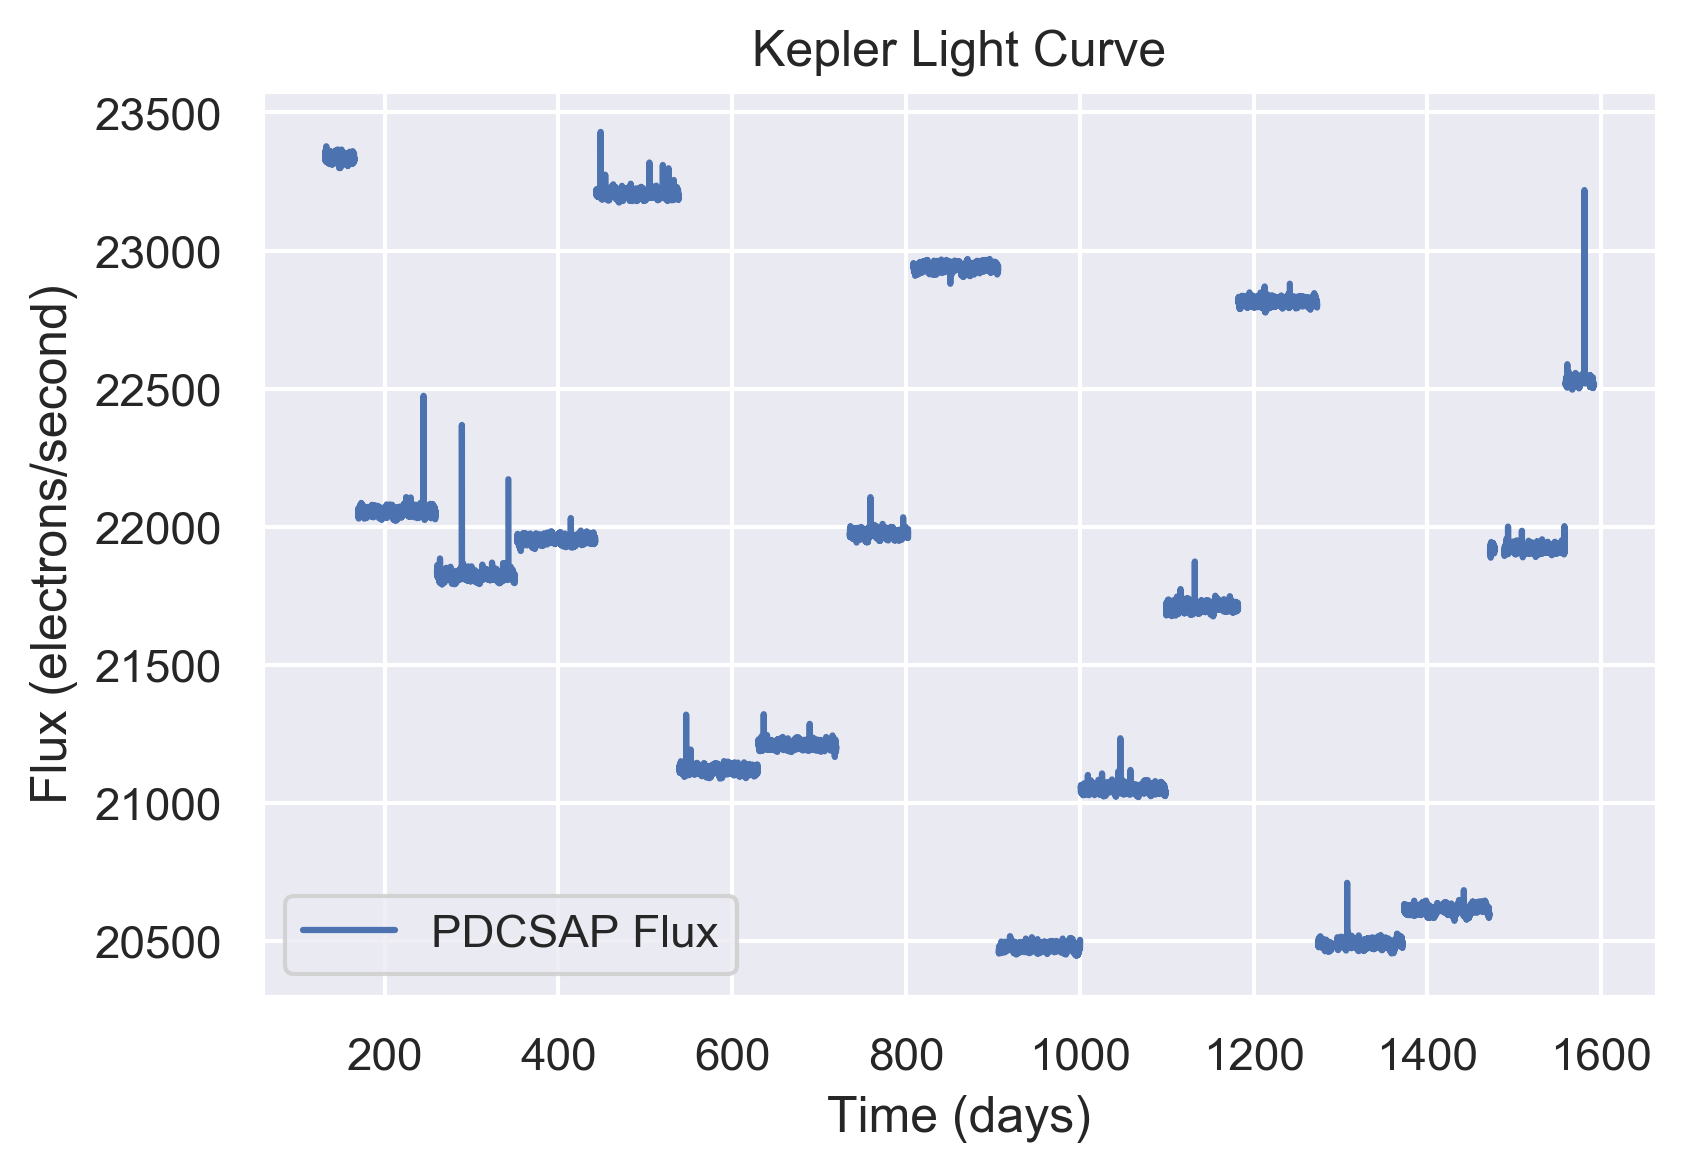

In [77]:
# Convert the time array to full BJD by adding the offset back in.
bjds = times

plt.figure(1,dpi=300)
# Plot the time, uncorrected and corrected fluxes.
plt.plot(bjds, pdcsap_fluxes, '-b', label='PDCSAP Flux') 
plt.title('Kepler Light Curve')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Flux (electrons/second)')
plt.show()